<a href="https://colab.research.google.com/github/MaLuisa7/Nonparametric-methods/blob/main/Cardiovascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import statsmodels.api as sm

# lectura de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path  = '/content/drive/MyDrive/dataset_flower/CVD_cleaned.csv'
df = pd.read_csv(path, sep =',')

In [4]:
df.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4


# Analisis descriptivo general

In [5]:
df.info() # no hay nans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [6]:
df.drop_duplicates(inplace=True) # df original 308854 --> df sin duplicados 308774 , habia 80 dupliados
df.shape

(308774, 19)

In [7]:
lst_values = []
for i in range(0 ,df.shape[1]):
  vals = df.iloc[:,i].unique()
  lst_values.append([df.iloc[:,i].name, len(vals), vals])
df_values = pd.DataFrame(lst_values)
df_values

,0,1,2
0,General_Health,5,"[Poor, Very Good, Good, Fair, Excellent]"
1,Checkup,5,"[Within the past 2 years, Within the past year..."
2,Exercise,2,"[No, Yes]"
3,Heart_Disease,2,"[No, Yes]"
4,Skin_Cancer,2,"[No, Yes]"
5,Other_Cancer,2,"[No, Yes]"
6,Depression,2,"[No, Yes]"
7,Diabetes,4,"[No, Yes, No, pre-diabetes or borderline diabe..."
8,Arthritis,2,"[Yes, No]"
9,Sex,2,"[Female, Male]"


In [8]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [9]:
df_continuas = df.loc[:, ['Height_(cm)', 'Weight_(kg)', 'BMI',
                          'Alcohol_Consumption', 'Fruit_Consumption',
                          'Green_Vegetables_Consumption', 'FriedPotato_Consumption'] ]
df_continuas.describe()   # 7

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.615220,83.590399,28.626813,5.097557,29.834290,15.109517,6.297237
std,10.658452,21.344664,6.522810,8.200434,24.877812,14.926912,8.583837
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [10]:
df_categoricas = df.loc[:, ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease',
                            'Skin_Cancer',   'Other_Cancer', 'Depression',
                            'Diabetes', 'Arthritis', 'Sex','Smoking_History','Age_Category']]#12
df_categoricas.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Smoking_History,Age_Category
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,Yes,70-74
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,No,70-74
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,No,60-64
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,No,75-79
4,Good,Within the past year,No,No,No,No,No,No,No,Male,Yes,80+


In [11]:
for i in range(0 , df_categoricas.shape[1]):
  print(df_categoricas.iloc[:,i].value_counts())
  print('------------------------------------')

Very Good    110351
Good          95355
Excellent     55929
Fair          35808
Poor          11331
Name: General_Health, dtype: int64
------------------------------------
Within the past year       239295
Within the past 2 years     37210
Within the past 5 years     17442
5 or more years ago         13420
Never                        1407
Name: Checkup, dtype: int64
------------------------------------
Yes    239305
No      69469
Name: Exercise, dtype: int64
------------------------------------
No     283803
Yes     24971
Name: Heart_Disease, dtype: int64
------------------------------------
No     278782
Yes     29992
Name: Skin_Cancer, dtype: int64
------------------------------------
No     278897
Yes     29877
Name: Other_Cancer, dtype: int64
------------------------------------
No     246875
Yes     61899
Name: Depression, dtype: int64
------------------------------------
No                                            259062
Yes                                            40170
No,

El ejercicio se acotara a:
  

* Aquellas personas que miden menos de 1.20
* Aquellas personas pesan mas de 250 kgs



In [12]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [13]:

df1 = df.copy()
df1 = df1[(df1.loc[:, 'Height_(cm)'] >120) & (df1.loc[:, 'Weight_(kg)'] <250) ]
df1.shape #(308683, 19)

(308683, 19)

In [14]:
df1.head(2)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4


# Preprocesamiento de datos

In [15]:
df2 = df1.copy()
df2['Checkup'] =df1['Checkup'].replace({'Within the past 2 years':0, "Within the past year":1, 'Within the past 5 years':2,'5 or more years ago':3 ,'Never':4 })
df2['General_Health'] =df1['General_Health'].replace({'Poor':0, "Fair":1, 'Good':2,'Very Good':3,'Excellent':4})
df2['Exercise']= df1['Exercise'].replace({'Yes':1, "No":0})
df2['Heart_Disease']= df1['Heart_Disease'].replace({'Yes':1, "No":0})
df2['Skin_Cancer']= df1['Skin_Cancer'].replace({'Yes':1, "No":0})
df2['Other_Cancer']= df1['Other_Cancer'].replace({'Yes':1, "No":0})
df2['Depression']= df1['Depression'].replace({'Yes':1, "No":0})
df2['Diabetes']= df1['Diabetes'].replace({'Yes':1, "No":0,"No, pre-diabetes or borderline diabetes":2,"Yes, but female told only during pregnancy":3 })
df2['Arthritis']= df1['Arthritis'].replace({'Yes':1, "No":0})
df2['Smoking_History']= df1['Smoking_History'].replace({'Yes':1, "No":0})
df2['Sex']= df1['Sex'].replace({'Female':1, "Male":0})
df2['Age_Category'] =  df1['Age_Category'].replace({'18-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6, '50-54':7, '55-59':8, '60-64':9, '65-69':10, '70-74':11, '75-79':12,'80+':13})
df2.head(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,0,0,0,0,0,0,0,1,1,11,150,32.66,14.54,1,0,30,16,12
1,3,1,0,1,0,0,0,1,0,1,11,165,77.11,28.29,0,0,30,0,4
2,3,1,1,0,0,0,0,1,0,1,9,163,88.45,33.47,0,4,12,3,16


# Subsampling

In [16]:
#se hizo un subsampling para tener mismo numero de muestras en ambas clases
df_0 = df2.query("Heart_Disease == 0").sample(n=24966, replace=False, random_state=7) #(24966, 19)
df_1 = df2.query("Heart_Disease == 1")
df3 = pd.concat([df_0, df_1], axis =0)
df3.shape

(49932, 19)

# Modelo de KNN con diferentes parametros

In [66]:
ran_state = [1,2,3,4,5,6,7,8,9,10]
lst_resultados =[]
lst_accs = []
lst_precision = []
lst_recall = []
lst_f1 = []
numero_vecinos = 20
for i in range(0 , len(ran_state)):
  # se toma la muestra
  df_sample = df3.groupby("Heart_Disease").sample(n=1000, random_state=ran_state[i]).reset_index(drop=True)

  # se separan por grupos de train y test para cada clase
  lim_train_0 = int(len(df_sample)*.80 /2)
  lim_test_0 = int(len(df_sample)/2 )
  lim_train_0,lim_test_0

  df_sample_0 = df_sample.query("Heart_Disease == 0 ").reset_index(drop=True)
  df_sample_0_train = df_sample_0.iloc[:lim_train_0 , : ]
  df_sample_0_test = df_sample_0.iloc[lim_train_0: lim_test_0,:]

  df_sample_1 = df_sample.query("Heart_Disease == 1 ").reset_index(drop=True)
  df_sample_1_train = df_sample_1.iloc[:lim_train_0  ,:]
  df_sample_1_test =  df_sample_1.iloc[lim_train_0: lim_test_0,:]

  df_sample_train = pd.concat([df_sample_0_train,df_sample_1_train], axis=0)
  df_sample_test = pd.concat([df_sample_0_test,df_sample_1_test], axis=0)

  #tomamos la variable respuesta
  y_train = df_sample_train['Heart_Disease']
  y_test = df_sample_test['Heart_Disease']
  X_train = df_sample_train.drop(columns= ['Heart_Disease'])
  X_test = df_sample_test.drop(columns= ['Heart_Disease'])

  #modelos
  knn_v1 = KNeighborsClassifier(n_neighbors= numero_vecinos ,weights='uniform', p = 1)
  knn_v2 = KNeighborsClassifier(n_neighbors= numero_vecinos ,weights='uniform', p = 2)
  knn_v3 = KNeighborsClassifier(n_neighbors= numero_vecinos ,weights='distance', p = 1)
  knn_v4 = KNeighborsClassifier(n_neighbors= numero_vecinos ,weights='distance', p = 2)

  knn_v1.fit(X_train, y_train)
  y_pred_v1 = knn_v1.predict(X_test)

  knn_v2.fit(X_train, y_train)
  y_pred_v2 = knn_v2.predict(X_test)

  knn_v3.fit(X_train, y_train)
  y_pred_v3 = knn_v3.predict(X_test)

  knn_v4.fit(X_train, y_train)
  y_pred_v4 = knn_v4.predict(X_test)

  #accuracies
  acc_v1 = accuracy_score(y_test, y_pred_v1)
  acc_v2 = accuracy_score(y_test, y_pred_v2)
  acc_v3 = accuracy_score(y_test, y_pred_v3)
  acc_v4 = accuracy_score(y_test, y_pred_v4)
  lst_accs.append([acc_v1,acc_v2,acc_v3,acc_v4,ran_state[i]])

  #presicion
  pres_v1 = precision_score(y_test, y_pred_v1)
  pres_v2 = precision_score(y_test, y_pred_v2)
  pres_v3 = precision_score(y_test, y_pred_v3)
  pres_v4 = precision_score(y_test, y_pred_v4)
  lst_precision.append([pres_v1,pres_v2,pres_v3,pres_v4,ran_state[i]])

   #recall
  rec_v1 = recall_score(y_test, y_pred_v1)
  rec_v2 = recall_score(y_test, y_pred_v2)
  rec_v3 = recall_score(y_test, y_pred_v3)
  rec_v4 = recall_score(y_test, y_pred_v4)
  lst_recall.append([rec_v1,rec_v2,rec_v3,rec_v4,ran_state[i]])

  #presicion
  f1_v1 = f1_score(y_test, y_pred_v1)
  f1_v2 = f1_score(y_test, y_pred_v2)
  f1_v3 = f1_score(y_test, y_pred_v3)
  f1_v4 = f1_score(y_test, y_pred_v4)
  lst_f1.append([f1_v1,f1_v2,f1_v3,f1_v4,ran_state[i]])

  #resultados de y's
  resultados = pd.DataFrame(data = y_test.values, columns =['y_test'])
  resultados['y_pred_v1']=y_pred_v1
  resultados['y_pred_v2']=y_pred_v2
  resultados['y_pred_v3']=y_pred_v3
  resultados['y_pred_v4']=y_pred_v4
  resultados['experimento']=ran_state[i]


  lst_resultados.append(resultados)

# Resultados

In [67]:
resultados_exp = pd.concat(lst_resultados)
resultados_exp.head()

,y_test,y_pred_v1,y_pred_v2,y_pred_v3,y_pred_v4,experimento
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,1,1,1,1
3,0,1,1,1,1,1
4,0,0,0,0,0,1


,acc_v1,acc_v2,acc_v3,acc_v4
count,10.000000,10.000000,10.000000,10.000000
mean,0.653250,0.598250,0.655500,0.606500
std,0.027463,0.017719,0.026268,0.026515
min,0.597500,0.560000,0.587500,0.555000
25%,0.638125,0.593125,0.653750,0.591250
50%,0.660000,0.601250,0.658750,0.605000
75%,0.671875,0.606875,0.665625,0.626250
max,0.685000,0.625000,0.685000,0.645000


Text(0.5, 1.0, 'Accuracy by type of model')

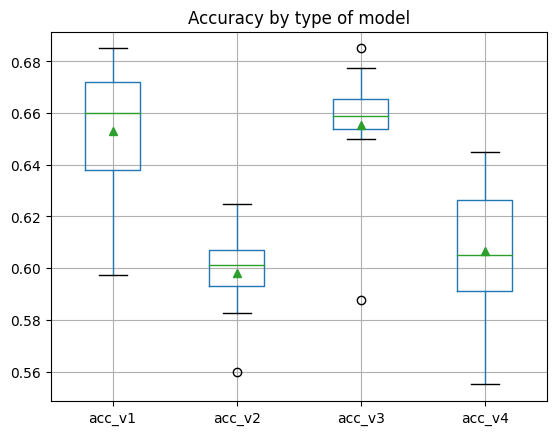

In [68]:
df_acc = pd.DataFrame(lst_accs, columns = ['acc_v1','acc_v2','acc_v3','acc_v4','ran_state'] )
display(df_acc.iloc[:,:-1].describe())
df_acc.iloc[:,:-1].boxplot(showmeans=True)
plt.title(  'Accuracy by type of model')

,pres_v1,pres_v2,pres_v3,pres_v4
count,10.000000,10.000000,10.000000,10.000000
mean,0.660010,0.608208,0.644331,0.600185
std,0.032552,0.021908,0.026288,0.022336
min,0.597015,0.566667,0.575758,0.551887
25%,0.645330,0.595961,0.641472,0.590116
50%,0.664583,0.610153,0.648771,0.606729
75%,0.682955,0.616008,0.660086,0.613761
max,0.702381,0.649007,0.666667,0.626087


Text(0.5, 1.0, 'Presicion by type of model')

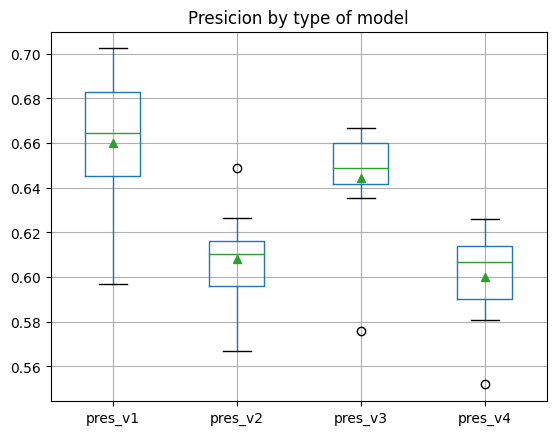

In [69]:
df_pres = pd.DataFrame(lst_precision, columns = ['pres_v1','pres_v2','pres_v3','pres_v4','ran_state'] )
display(df_pres.iloc[:,:-1].describe())
df_pres.iloc[:,:-1].boxplot(showmeans=True)
plt.title(  'Presicion by type of model')

,recall_v1,recall_v2,recall_v3,recall_v4
count,10.000000,10.000000,10.000000,10.00000
mean,0.635500,0.555000,0.697000,0.63650
std,0.040855,0.043269,0.036833,0.05121
min,0.590000,0.490000,0.640000,0.56000
25%,0.603750,0.522500,0.673750,0.59750
50%,0.625000,0.555000,0.692500,0.63250
75%,0.665000,0.585000,0.715000,0.67750
max,0.705000,0.620000,0.765000,0.72000


Text(0.5, 1.0, 'Recall by type of model')

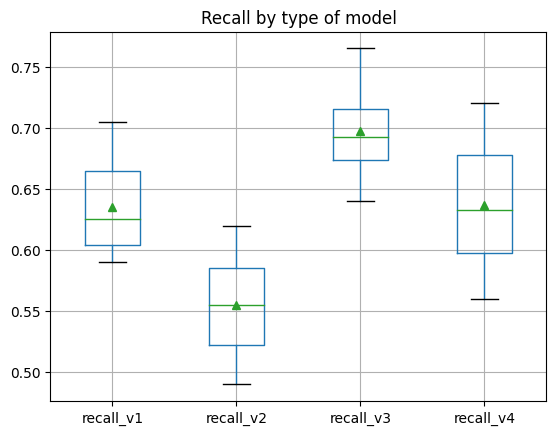

In [70]:
df_recall = pd.DataFrame(lst_recall, columns = ['recall_v1','recall_v2','recall_v3','recall_v4','ran_state'] )
display(df_recall.iloc[:,:-1].describe())
df_recall.iloc[:,:-1].boxplot(showmeans=True)
plt.title(  'Recall by type of model')

,f1_v1,f1_v2,f1_v3,f1_v4
count,10.000000,10.000000,10.000000,10.000000
mean,0.646732,0.579435,0.669092,0.617251
std,0.028194,0.025756,0.024410,0.033129
min,0.598504,0.536842,0.617169,0.567961
25%,0.627663,0.560515,0.659314,0.593782
50%,0.645203,0.582667,0.669878,0.611914
75%,0.664491,0.592026,0.681406,0.645514
max,0.691176,0.623116,0.708333,0.669767


Text(0.5, 1.0, 'F1 by type of model')

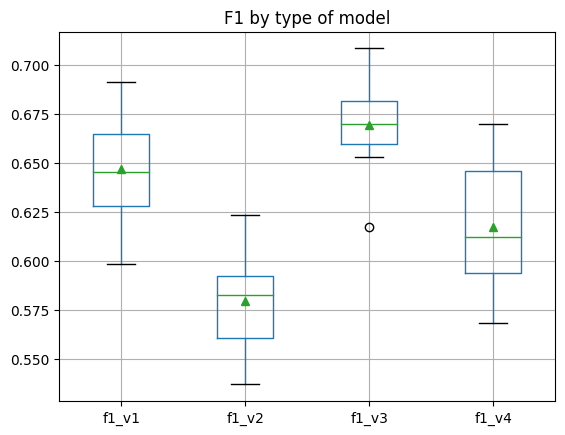

In [71]:
df_f1 = pd.DataFrame(lst_f1, columns = ['f1_v1','f1_v2','f1_v3','f1_v4','ran_state'] )
display(df_f1.iloc[:,:-1].describe())
df_f1.iloc[:,:-1].boxplot(showmeans=True)
plt.title(  'F1 by type of model')

# ANOVA 2ways

In [72]:
#https://goldinlocks.github.io/Basic-Experimental-Design-in-Python/


,variable,value,distancia,weights
0,acc_v1,0.6725,1,uniform
1,acc_v1,0.6350,1,uniform
2,acc_v1,0.6800,1,uniform
3,acc_v1,0.6475,1,uniform
4,acc_v1,0.5975,1,uniform


             sum_sq    df          F        PR(>F)
distancia  0.027040   1.0  44.983083  6.987687e-08
weights    0.000276   1.0   0.458523  5.025271e-01
Residual   0.022241  37.0        NaN           NaN

pval< alfa: True


<Axes: xlabel='weights', ylabel='value'>

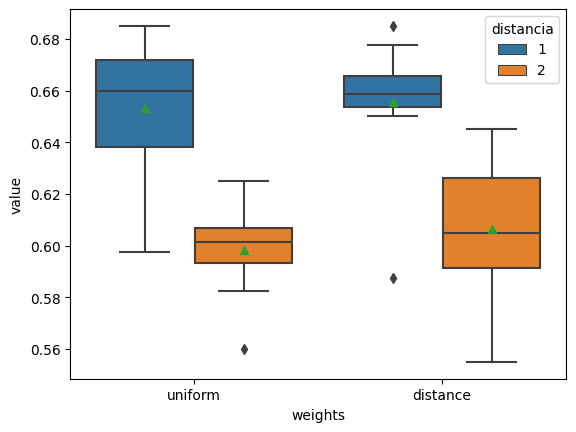

In [73]:
df_acc_metl = df_acc.melt()
df_acc_metl['distancia'] = df_acc_metl.variable
df_acc_metl['weights'] = df_acc_metl.variable
df_acc_metl.loc[:,'distancia'].replace({'acc_v1' : 1 ,'acc_v2' : 2, 'acc_v3' : 1 ,'acc_v4' : 2  }, inplace=True)
df_acc_metl.loc[:,'weights'].replace({'acc_v1' : 'uniform' ,'acc_v2' : 'uniform', 'acc_v3' :'distance' ,'acc_v4' : 'distance'  }, inplace=True)
df_acc_metl = df_acc_metl.query('variable !="ran_state"')
display(df_acc_metl.head() )

# Create model DOE
formula = 'value ~ distancia + weights'
model = sm.formula.ols(formula, data=df_acc_metl).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)
# H0 : las medias de los grupos son iguales
#h1 : las medias de los grupos no son iguales

pval = 0.013711
alfa = 0.05
print('\npval< alfa:', pval<alfa) # si pvalor es menor a alfa, se rechaza H0 las medias no son iguales y las distancias y weights si tienen un efecto significativo en el accuracy del modelo

sns.boxplot(x="weights", y="value", hue="distancia",data=df_acc_metl, showmeans=True)

,variable,value,distancia,weights
0,pres_v1,0.688525,1,uniform
1,pres_v1,0.646739,1,uniform
2,pres_v1,0.681818,1,uniform
3,pres_v1,0.651282,1,uniform
4,pres_v1,0.597015,1,uniform


             sum_sq    df          F        PR(>F)
distancia  0.023015   1.0  34.458174  9.414405e-07
weights    0.001404   1.0   2.102770  1.554573e-01
Residual   0.024713  37.0        NaN           NaN


<Axes: xlabel='weights', ylabel='value'>

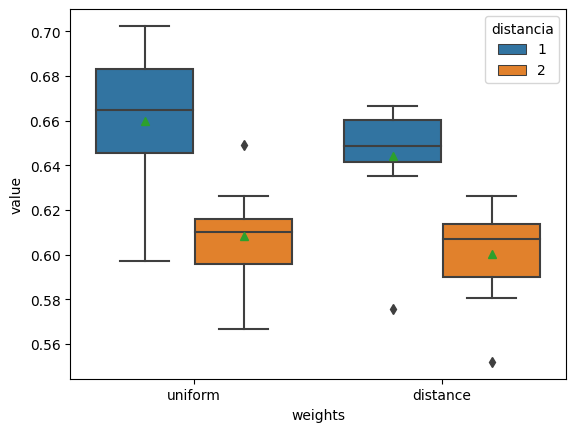

In [74]:
df_pres_metl = df_pres.melt()
df_pres_metl['distancia'] = df_pres_metl.variable
df_pres_metl['weights'] = df_pres_metl.variable
df_pres_metl.loc[:,'distancia'].replace({'pres_v1' : 1 ,'pres_v2' : 2, 'pres_v3' : 1 ,'pres_v4' : 2  }, inplace=True)
df_pres_metl.loc[:,'weights'].replace({'pres_v1' : 'uniform' ,'pres_v2' : 'uniform', 'pres_v3' :'distance' ,'pres_v4' : 'distance'  }, inplace=True)
df_pres_metl = df_pres_metl.query('variable !="ran_state"')
display(df_pres_metl.head() )

# Create model DOE
formula = 'value ~ distancia + weights'
model = sm.formula.ols(formula, data=df_pres_metl).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)
# H0 : las medias de los grupos son iguales
#h1 : las medias de los grupos no son iguales

sns.boxplot(x="weights", y="value", hue="distancia",data=df_pres_metl, showmeans=True)

,variable,value,distancia,weights
0,recall_v1,0.630,1,uniform
1,recall_v1,0.595,1,uniform
2,recall_v1,0.675,1,uniform
3,recall_v1,0.635,1,uniform
4,recall_v1,0.600,1,uniform


             sum_sq    df          F    PR(>F)
distancia  0.049702   1.0  26.774296  0.000008
weights    0.051122   1.0  27.539237  0.000007
Residual   0.068685  37.0        NaN       NaN


<Axes: xlabel='weights', ylabel='value'>

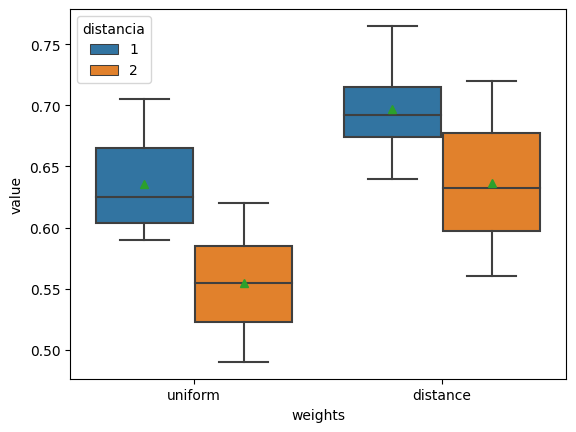

In [75]:
df_recall_metl = df_recall.melt()
df_recall_metl['distancia'] = df_recall_metl.variable
df_recall_metl['weights'] = df_recall_metl.variable
df_recall_metl.loc[:,'distancia'].replace({'recall_v1' : 1 ,'recall_v2' : 2, 'recall_v3' : 1 ,'recall_v4' : 2  }, inplace=True)
df_recall_metl.loc[:,'weights'].replace({'recall_v1' : 'uniform' ,'recall_v2' : 'uniform', 'recall_v3' :'distance' ,'recall_v4' : 'distance'  }, inplace=True)
df_recall_metl = df_recall_metl.query('variable !="ran_state"')
display(df_recall_metl.head() )

# Create model DOE
formula = 'value ~ distancia + weights'
model = sm.formula.ols(formula, data=df_recall_metl).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)
# H0 : las medias de los grupos son iguales
#h1 : las medias de los grupos no son iguales

sns.boxplot(x="weights", y="value", hue="distancia",data=df_recall_metl, showmeans=True)


,variable,value,distancia,weights
0,f1_v1,0.657963,1,uniform
1,f1_v1,0.619792,1,uniform
2,f1_v1,0.678392,1,uniform
3,f1_v1,0.643038,1,uniform
4,f1_v1,0.598504,1,uniform


             sum_sq    df          F        PR(>F)
distancia  0.035484   1.0  45.332333  6.448925e-08
weights    0.009053   1.0  11.565058  1.624730e-03
Residual   0.028962  37.0        NaN           NaN


<Axes: xlabel='weights', ylabel='value'>

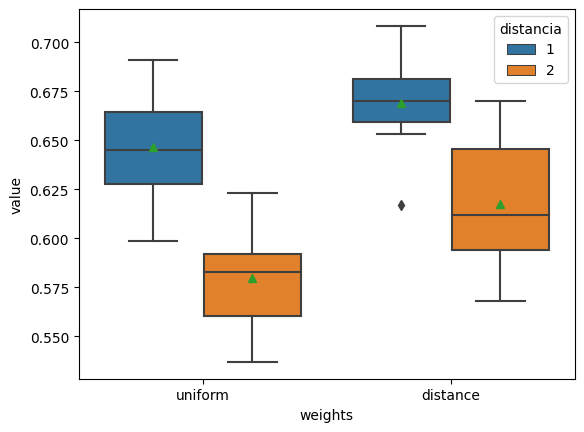

In [76]:
df_f1_metl = df_f1.melt()
df_f1_metl['distancia'] = df_f1_metl.variable
df_f1_metl['weights'] = df_f1_metl.variable
df_f1_metl.loc[:,'distancia'].replace({'f1_v1' : 1 ,'f1_v2' : 2, 'f1_v3' : 1 ,'f1_v4' : 2  }, inplace=True)
df_f1_metl.loc[:,'weights'].replace({'f1_v1' : 'uniform' ,'f1_v2' : 'uniform', 'f1_v3' :'distance' ,'f1_v4' : 'distance'  }, inplace=True)
df_f1_metl = df_f1_metl.query('variable !="ran_state"')
display(df_f1_metl.head() )

# Create model DOE
formula = 'value ~ distancia + weights'
model = sm.formula.ols(formula, data=df_f1_metl).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)
# H0 : las medias de los grupos son iguales
#h1 : las medias de los grupos no son iguales

sns.boxplot(x="weights", y="value", hue="distancia",data=df_f1_metl, showmeans=True)


# De aqui para abajo no hacer caso, esto se deja en caso de hacer mas experimentos

In [28]:
# se separan por grupos de train y test para cada clase
lim_train_0 = int(len(df_sample)*.80 /2)
lim_test_0 = int(len(df_sample)/2 )
lim_train_0,lim_test_0

df_sample_0 = df_sample.query("Heart_Disease == 0 ").reset_index(drop=True)
df_sample_0_train = df_sample_0.iloc[:lim_train_0 , : ]
df_sample_0_test = df_sample_0.iloc[lim_train_0: lim_test_0,:]

df_sample_1 = df_sample.query("Heart_Disease == 1 ").reset_index(drop=True)
df_sample_1_train = df_sample_1.iloc[:lim_train_0  ,:]
df_sample_1_test =  df_sample_1.iloc[lim_train_0: lim_test_0,:]

df_sample_train = pd.concat([df_sample_0_train,df_sample_1_train], axis=0)
df_sample_test = pd.concat([df_sample_0_test,df_sample_1_test], axis=0)

df_sample_0_train.shape, df_sample_0_test.shape, df_sample_1_train.shape, df_sample_1_test.shape, df_sample_train.shape, df_sample_test.shape

((800, 19), (200, 19), (800, 19), (200, 19), (1600, 19), (400, 19))

In [29]:
#tomamos la variable respuesta
y_train = df_sample_train['Heart_Disease']
y_test = df_sample_test['Heart_Disease']
X_train = df_sample_train.drop(columns= ['Heart_Disease'])
X_test = df_sample_test.drop(columns= ['Heart_Disease'])
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((1600,), (400,), (1600, 18), (400, 18))

In [30]:


knn_v1 = KNeighborsClassifier(n_neighbors=2,weights='uniform', p = 1)
knn_v2 = KNeighborsClassifier(n_neighbors=2,weights='uniform', p = 2)
knn_v3 = KNeighborsClassifier(n_neighbors=2,weights='distance', p = 1)
knn_v4 = KNeighborsClassifier(n_neighbors=2,weights='distance', p = 2)

knn_v1.fit(X_train, y_train)
y_pred_v1 = knn_v1.predict(X_test)

knn_v2.fit(X_train, y_train)
y_pred_v2 = knn_v2.predict(X_test)

knn_v3.fit(X_train, y_train)
y_pred_v3 = knn_v3.predict(X_test)

knn_v4.fit(X_train, y_train)
y_pred_v4 = knn_v4.predict(X_test)

resultados = pd.DataFrame(data = y_test.values, columns =['y_test'])
resultados['y_pred_v1']=y_pred_v1
resultados['y_pred_v2']=y_pred_v2
resultados['y_pred_v3']=y_pred_v3
resultados['y_pred_v4']=y_pred_v4


In [31]:
resultados

,y_test,y_pred_v1,y_pred_v2,y_pred_v3,y_pred_v4
0,0,1,1,1,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,0
4,0,0,0,1,1
...,...,...,...,...,...
395,1,0,0,1,1
396,1,1,1,1,1
397,1,0,0,0,0
398,1,1,1,1,1


In [32]:
y_test.reset_index(drop=True)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Heart_Disease, Length: 400, dtype: int64